In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#model and tools
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

# Data unpacking
We will analyze the stocks of top 10 S&P 500 companies in period from 2017 to 2021

In [17]:
years = [2017, 2018, 2019, 2020, 2021]
companies = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'BRK.B', 'UNH', 'JNJ', 'XOM']
data = dict()
for company in companies:
    df = pd.DataFrame()
    for year in range(2017, 2022):
        try: 
            tmp_df = pd.read_csv('data/'+str(year)+'/'+company+'.csv')
            df = pd.concat([df, tmp_df])
        except: continue
    data[company] = df
    print(company)

AAPL
MSFT
AMZN
TSLA
GOOGL
GOOG
BRK.B
UNH
JNJ
XOM


In [18]:
for company in companies:
    data[company]['close_log'] = np.log10(data[company].close)

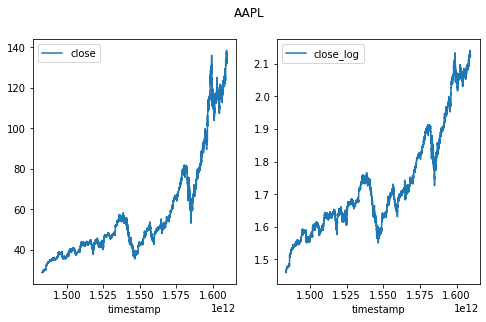

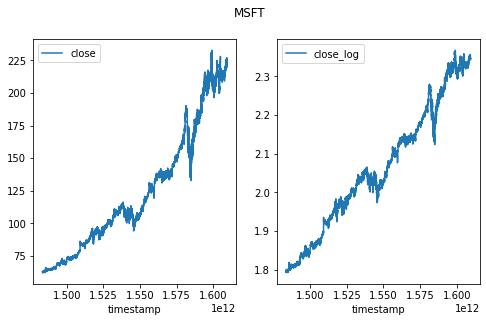

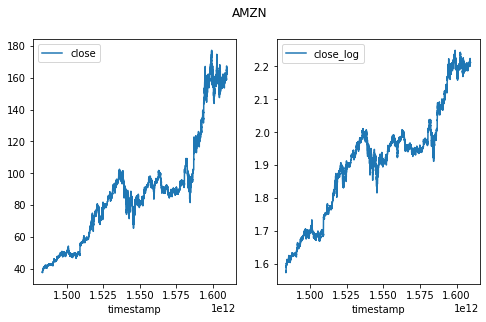

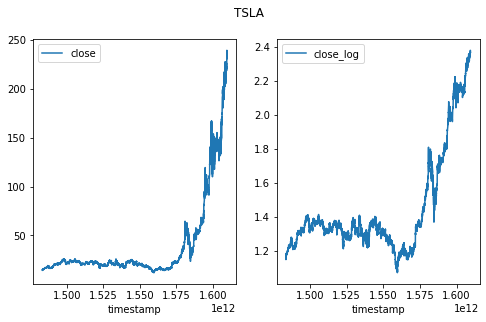

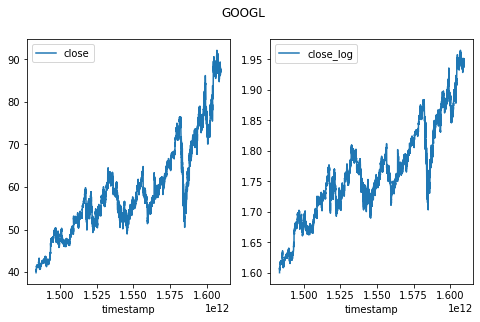

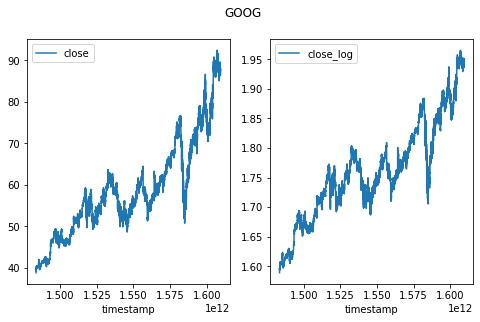

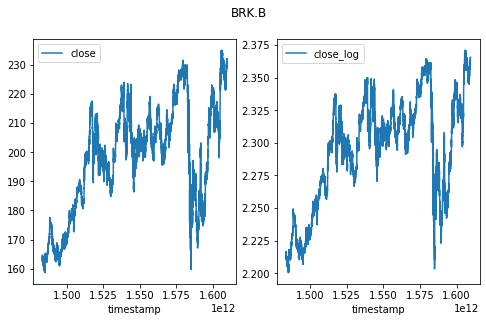

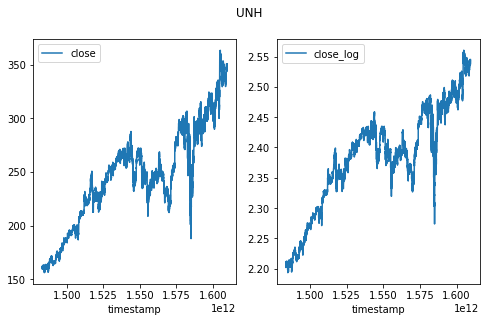

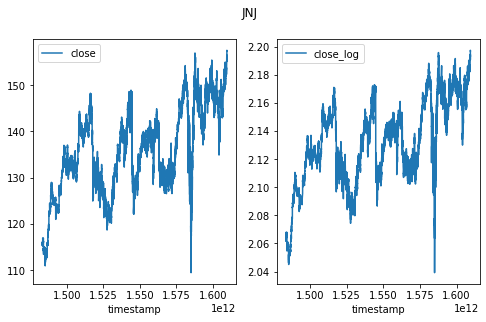

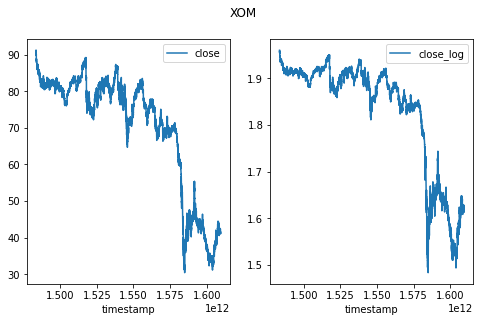

In [66]:
for company in companies:
    fig = plt.figure(figsize=(8, 4.5))
    axl = fig.add_subplot(1, 2, 1)
    axr = fig.add_subplot(1, 2, 2)
    data[company].plot('timestamp', 'close', ax=axl)
    data[company].plot('timestamp', 'close_log', ax=axr)
    fig.suptitle(company)
    plt.show()

So we can see that big part of companies has uptrend.

# The characteristics of time series
Here we will check the stationarity of timeseries and analyze the autocorrelation and partial autocorrelation graphs. After that we will define the p, d, q parameters.

In [62]:
maxlag = int(2*((len(data[company])/100)**0.25))

In [63]:
for company in companies:
    
    print('Dickey-Fuller test for', company, '\n')
    
    result = adfuller(data[company].close_log.dropna(), maxlag=maxlag)
    print('Original Series')
    print('p-value: ', result[1])

    result = adfuller(data[company].close_log.diff().dropna(), maxlag=maxlag)
    print('1st Order Differencing')
    print('p-value: ', result[1])

    result = adfuller(data[company].close_log.diff().diff().dropna(), maxlag=maxlag)
    print('2nd Order Differencing')
    print('p-value: ', result[1])

Dickey-Fuller test for AAPL 

Original Series
p-value:  0.9732632155313452
1st Order Differencing
p-value:  0.0
2nd Order Differencing
p-value:  0.0
Dickey-Fuller test for MSFT 

Original Series
p-value:  0.883135232488502
1st Order Differencing
p-value:  0.0
2nd Order Differencing
p-value:  0.0
Dickey-Fuller test for AMZN 

Original Series
p-value:  0.7253896482693413
1st Order Differencing
p-value:  0.0
2nd Order Differencing
p-value:  0.0
Dickey-Fuller test for TSLA 

Original Series
p-value:  0.9977512613108632
1st Order Differencing
p-value:  0.0
2nd Order Differencing
p-value:  0.0
Dickey-Fuller test for GOOGL 

Original Series
p-value:  0.6194508717791889
1st Order Differencing
p-value:  0.0
2nd Order Differencing
p-value:  0.0
Dickey-Fuller test for GOOG 

Original Series
p-value:  0.6253598279040229
1st Order Differencing
p-value:  0.0
2nd Order Differencing
p-value:  0.0
Dickey-Fuller test for BRK.B 

Original Series
p-value:  0.16614614612335182
1st Order Differencing
p-valu

So we assume that 1st order differencing is enough to make stationar time series.

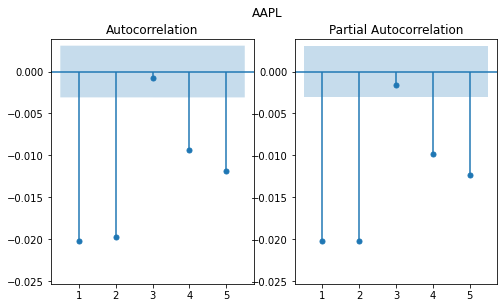

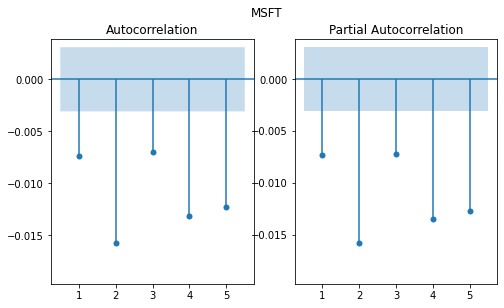

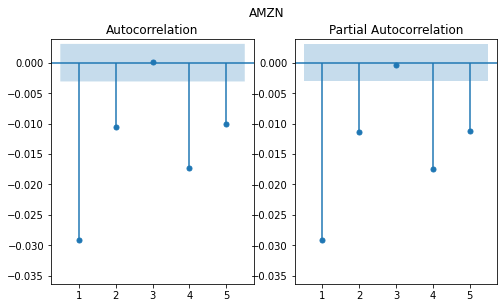

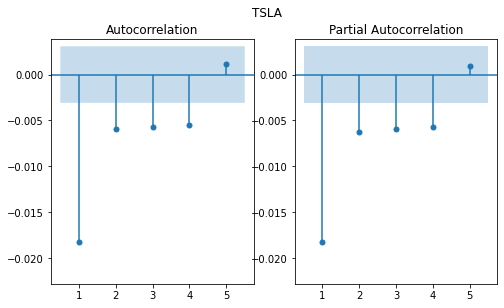

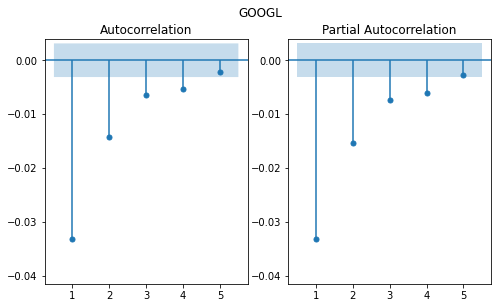

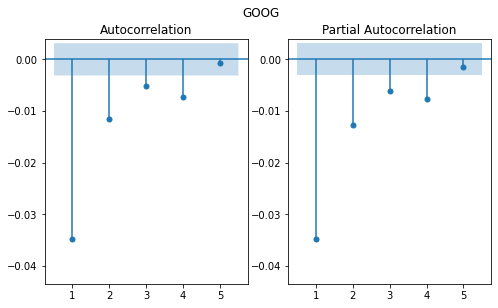

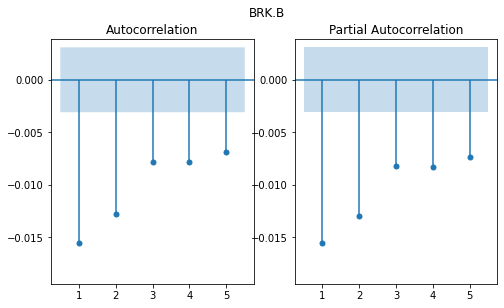

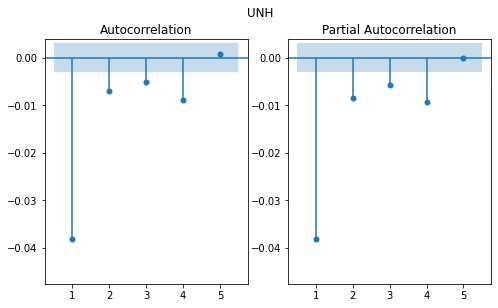

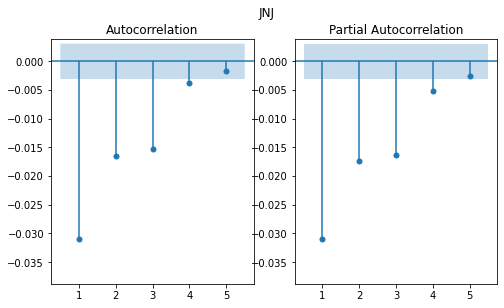

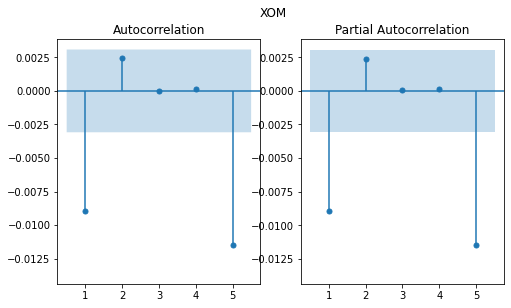

In [67]:
for company in companies:
    fig = plt.figure(figsize=(8, 4.5))
    axl = fig.add_subplot(1, 2, 1)
    axr = fig.add_subplot(1, 2, 2)
    
    plot_acf(data[company].close_log.diff().dropna(), 
             lags=range(1, 6), auto_ylims=True, ax=axl)
    plot_pacf(data[company].close_log.diff().dropna(), 
              method='ywm', lags=range(1, 6), auto_ylims=True, ax=axr)
    
    fig.suptitle(company)
    plt.show()

From graphs we can define the q and p parameters:

In [68]:
pdq = dict()
pdq['AAPL'] = 2, 1, 2
pdq['MSFT'] = 5, 1, 5 #?
pdq['AMZN'] = 2, 1, 2
pdq['TSLA'] = 4, 1, 4
pdq['GOOGL'] = 5, 1, 4
pdq['GOOG'] = 4, 1, 4
pdq['BRK.B'] = 5, 1, 5 #?
pdq['UNH'] = 4, 1, 4
pdq['JNJ'] = 4, 1, 4
pdq['XOM'] = 1, 1, 1

# ARIMA-model

In [70]:
ARIMA_models = dict()
for company in companies:
    x, y = data[company].timestamp, data[company].close_log
    size = len(x)
    bound = int(0.8*size)

    x_train, x_test = x[:bound], x[bound:]
    y_train, y_test = y[:bound], y[bound:]
    
    arima_model = ARIMA(y_train, order=pdq[company])
    print('ARIMA-model for', company, 'ready')
    model = arima_model.fit()
    print('ARIMA-model for', company, 'fited')
    ARIMA_models[company] = model

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA-model for AAPL ready


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA-model for AAPL fited
ARIMA-model for MSFT ready


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA-model for MSFT fited
ARIMA-model for AMZN ready


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA-model for AMZN fited
ARIMA-model for TSLA ready


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\user\appdata\

ARIMA-model for TSLA fited
ARIMA-model for GOOGL ready


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA-model for GOOGL fited
ARIMA-model for GOOG ready


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA-model for GOOG fited
ARIMA-model for BRK.B ready


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA-model for BRK.B fited
ARIMA-model for UNH ready


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA-model for UNH fited
ARIMA-model for JNJ ready


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA-model for JNJ fited
ARIMA-model for XOM ready


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA-model for XOM fited


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 0.10053751510754715
R2: -4.1092622847245845
Spearman R: SpearmanrResult(correlation=-0.04358296062643141, pvalue=2.579211400283891e-35)


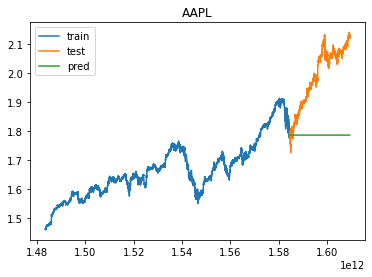

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 0.06357809605516972
R2: -9.590454207116862
Spearman R: SpearmanrResult(correlation=0.10888228235283828, pvalue=9.922848523222775e-212)


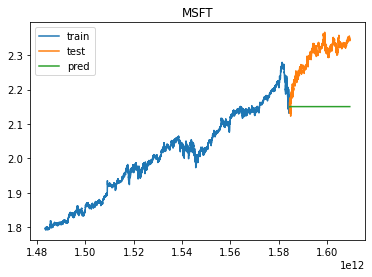

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 0.08787587949695001
R2: -6.916990759305843
Spearman R: SpearmanrResult(correlation=0.04058879840933137, pvalue=8.643087680564492e-31)


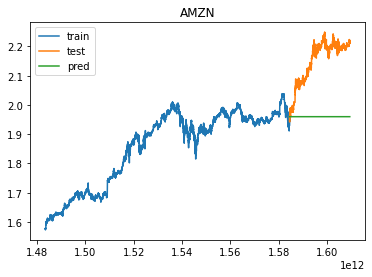

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 0.2738266681765303
R2: -5.414971646133262
Spearman R: SpearmanrResult(correlation=nan, pvalue=nan)


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


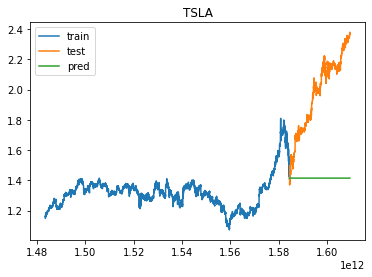

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 0.06943272151694437
R2: -5.636987029800393
Spearman R: SpearmanrResult(correlation=nan, pvalue=nan)


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


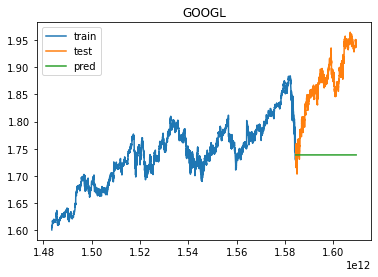

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 0.0625339480154276
R2: -4.718027576384934
Spearman R: SpearmanrResult(correlation=nan, pvalue=nan)


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


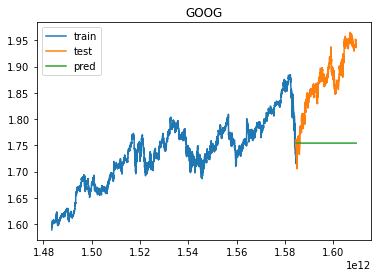

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 0.02213748919211171
R2: -1.4011275059603245
Spearman R: SpearmanrResult(correlation=0.027010872742521348, pvalue=1.6922499001902278e-14)


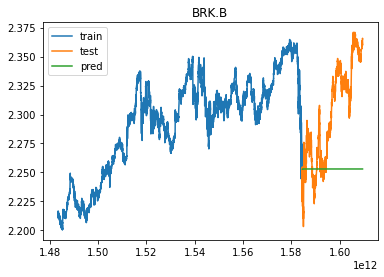

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 0.05159965362409361
R2: -8.13890240251416
Spearman R: SpearmanrResult(correlation=nan, pvalue=nan)


c:\users\user\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


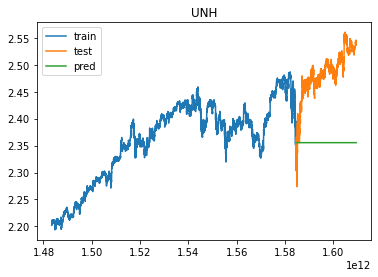

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 0.022692124605974695
R2: -4.930654683889754
Spearman R: SpearmanrResult(correlation=0.11220766566829637, pvalue=1.216013908900788e-224)


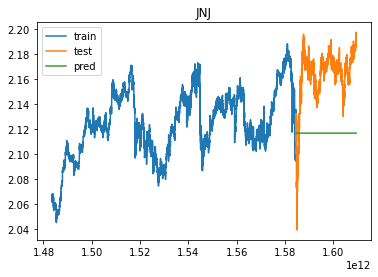

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MAPE: 0.043266334970957984
R2: -1.701185287028622
Spearman R: SpearmanrResult(correlation=-0.0005512187022926985, pvalue=0.8755089046333311)


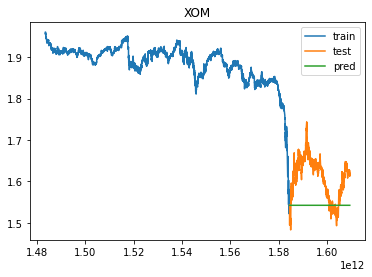

In [78]:
for company in companies:
    x, y = data[company].timestamp, data[company].close_log
    size = len(x)
    bound = int(0.8*size)

    x_train, x_test = x[:bound], x[bound:]
    y_train, y_test = y[:bound], y[bound:]
    y_pred = ARIMA_models[company].predict(start=len(x_train), end=len(x)-1)
    
    plt.plot(x_train, y_train, label='train')
    plt.plot(x_test, y_test, label='test')
    plt.plot(x_test, y_pred, label='pred')
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('R2:', r2_score(y_test, y_pred))
    print('Spearman R:', spearmanr(y_test, y_pred))
    plt.title(company)
    plt.legend()
    plt.show()

We can see that our prediction in general is constant function. It's a simple result, but we can see that stocks of all companies has a minimum at the end of train sample, but our prediction work in good way and works with that peak as with a usuall situation.